In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

# Locaation directory

In [3]:
train_dir = r'C:\Users\Suresh\cats_and_dogs_small\train'
validation_dir = r'C:\Users\Suresh\cats_and_dogs_small\validation'
test_dir = r'C:\Users\Suresh\cats_and_dogs_small\test'

# Data preprocessing

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
rotation_range = 40,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size = (150, 150),
batch_size = 20,
class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size = (150, 150),
batch_size = 20,
class_mode = "binary")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Importing VGG16 & Creating model architecture

In [6]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (150, 150, 3))

In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# Creating model

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers
model= models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
#conv_base.trainable = False ( to reduce the trainable param of VGG16 and increase the training speed)

# Compiling the model

In [11]:
from tensorflow.keras import optimizers

model.compile(loss = "binary_crossentropy",
             optimizer = optimizers.RMSprop(lr = 2e-5),
             metrics = ["acc"])

# Model training

In [12]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5", save_best_only = True)

In [14]:
history = model.fit_generator(
train_generator,
steps_per_epoch = 100,
epochs = 10,
validation_data = validation_generator,
validation_steps = 50,
callbacks = [checkpoint_cb])

Epoch 1/10
100/100 [==============================] - 643s 6s/step - loss: 0.4064 - acc: 0.8085 - val_loss: 0.1738 - val_acc: 0.9370
Epoch 2/10
100/100 [==============================] - 646s 6s/step - loss: 0.2569 - acc: 0.9020 - val_loss: 0.1467 - val_acc: 0.9470
Epoch 3/10
100/100 [==============================] - 735s 7s/step - loss: 0.1968 - acc: 0.9170 - val_loss: 0.1101 - val_acc: 0.9520
Epoch 4/10
100/100 [==============================] - 655s 7s/step - loss: 0.1876 - acc: 0.9280 - val_loss: 0.1188 - val_acc: 0.9560
Epoch 5/10
100/100 [==============================] - 651s 7s/step - loss: 0.1414 - acc: 0.9445 - val_loss: 0.2574 - val_acc: 0.9180
Epoch 6/10
100/100 [==============================] - 2102s 21s/step - loss: 0.1262 - acc: 0.9540 - val_loss: 0.1412 - val_acc: 0.9460
Epoch 7/10
100/100 [==============================] - 778s 8s/step - loss: 0.1019 - acc: 0.9620 - val_loss: 0.1138 - val_acc: 0.9590
Epoch 8/10
100/100 [==============================] - 694s 7s/step 

# Graph

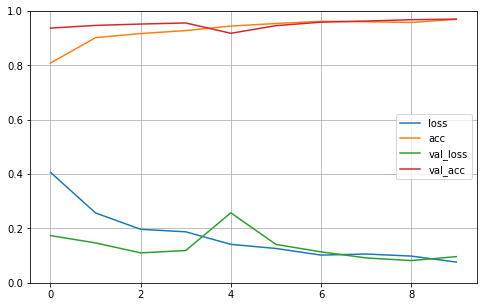

In [15]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Testing the model

In [16]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size = (150, 150),
batch_size = 20,
class_mode = "binary")

Found 1000 images belonging to 2 classes.


In [ ]:
Model.evaluate_generator(test_generator, steps = 50)